# Curso de Optimización (DEMAT)
## Parcial 2

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Mayo 25, 2022**    |
| Hora de inicio:                      | **15:00**            |
| Hora límite de entrega:              | **18:00**            |


### Indicaciones

Lea con cuidado los ejercicios.

Puede usar las notas de clase y las tareas hechas para resolver el examen.

Al final, entregue el notebook con sus respuestas, junto con los códigos que hagan falta para reproducir los resultados. Si es más de un archivo, genere un archivo ZIP que contenga el notebook y los scripts adicionales.

A partir del notebook genere un archivo PDF con las respuestas y envíelo por separado 
antes de la hora límite.


## Ejercicio 1. (5 puntos)

Sea 

$$ f(\mathbf{x}) = f(x_1, x_2) = 2x_1^{2} + x_2^{2} - x_1 x_2 - 6.5x_1  + 2.5x_2. $$

Considere el problema 

% $$ \min\; f(\mathbf{x}) \quad \text{sujeto a} \quad -1\leq x_1 \leq 1, \; -1\leq x_2 \leq 1.$$

Encontrar la solución usando un método de barrera logarítmica (Clase 25). 

Para esto construimos la función barrera logarítmica 

$$
b_{log}(\mathbf{x}; \mu) = f(x_1,x_2) + \frac{1}{\mu}(-log(1-x_1)-log(1-x_2)-log(1+x_1)-log(1+x_2) )
$$

1. Programar las funciones y sus gradientes

$$f(\mathbf{x}) \quad \text{y} \quad b_{log}(\mathbf{x}; \mu) $$ 

2. Programar el método de barrera  logarítmica:

a) Dar un punto inicial $\mathbf{x}_0$, la función $b_{log}(\mathbf{x}; \mu)$, su gradiente, $\mu_0$, una
   tolerancia $\tau>0$ y los parámetros que se necesiten para usar el método BFGS.

b) Hacer $k=0$ y repetir los siguientes pasos:

b1) Usando el método BFGS, calcular el mínimo $\mathbf{x}_{k+1}$ de $b_{log}(\mathbf{x}; \mu_k)$. Para
    el método BFGS use la tolerancia $\epsilon_m^{1/4}$ porque no necesitamos
    tener demasiada precisión en el cálculo. Además, para el algoritmo de 
    backtracking use $\alpha_{ini}=1$, para reducir la posibilidad de evaluar
    la función de barrera en puntos que están fuera de la región factible.

b2) Imprimir si el algoritmo BFGS encuentra la solución, y en ese caso imprimir

- el entero $k$
- el valor $\mu_k$,
- el número de iteraciones que realizó el algoritmo BFGS, 
- el punto $\mathbf{x}_{k+1}$ y 
- el valor  $f(\mathbf{x}_{k+1})$.

b3) Si $\|\mathbf{x}_{k+1} - \mathbf{x}_k\|<\tau$, terminar devolviendo  $\mathbf{x}_{k+1}$ 

b4) En caso contrario, hacer $\mu_{k+1} = 10\mu_k$, $k=k+1$ y volver al paso (b1)

3. Probar el algoritmo usando $\mathbf{x}_0 = (-0.75, 0.5)$, $\mu_0=1$ y $\tau=0.001$.

4. Si $(x_1^{k}, x_2^k)$ es el punto que devuelve el algoritmo de barrera 
   logarítmica y si está en
   frontera, genere la gráfica de la función evaluándola en puntos 
   sobre la arista en donde está punto para visualmente verificar que 
   tiene sentido el resultado.
   
### Solución:

A continuación probamos el algoritmo con un número de iteraciones máximo de $1000$ para el método de barrera y $50000$ para el BFGS, utilizando las tolerancias correspondientes.

In [1]:
import numpy as np
import importlib

# Tolerancia y numero maximo de iteraciones BFGS
tol_BFGS=np.finfo(float).eps**(1/4)
N_BFGS=5000
rho=0.1

# Tolerancia y numero de iteraciones BARRERA
tol_BARRERA=0.001
N_BARRERA=1000
x0=np.array([-0.75,0.5])
mu0=0.1

import lib_examen_2
importlib.reload(lib_examen_2)
from lib_examen_2 import *

# Prueba
xk=proof_barrera(barrera_f,grad_barrera_f,x0,mu0,N_BARRERA,N_BFGS,tol_BARRERA,tol_BFGS,rho,eje1_f)

k =  6
mu_k =  100000.0
iteraciones BFGS =  30
xk =  [[ 0.99999429]
 [-0.7499858 ]]
fk =  [-5.06249]


/home/roberto/Documentos/DEMAT/10mo Semestre/Materias/Optimización/Examen Parcial 2/lib_examen_2.py:19: RuntimeWarning: invalid value encountered in log
  aux=-(np.log(1.0-x_squeezed[0])+np.log(1.0+x_squeezed[0])+np.log(1.0-x_squeezed[1])+np.log(1.0+x_squeezed[1]))


Finalmente, evaluamos en la arista a la función $f$

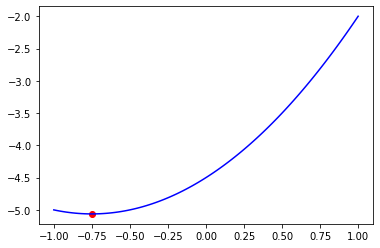

In [2]:
import warnings
warnings.filterwarnings("ignore")


def profile_f(x2):
    vec=np.array([1.0,x2])
    return eje1_f(vec)
import matplotlib.pyplot as plt
x2_linspace=np.linspace(-1.0,1.0,100)
profile_f_x2_linspace=np.array([profile_f(x2) for x2 in x2_linspace])

plt.plot(x2_linspace,profile_f_x2_linspace,color='blue')
fk=profile_f(xk[1])
plt.scatter(xk[1],fk, marker="o",color='red')

De lo que podemos observar que al menos el punto hallado $\mathbf{x}^\ast$, cerca de la frontera, es un mínimo local de la función $f$ considerando al menos la sección de la función correspondiente a la arista de la región factible.

## Ejercicio 2. (5 puntos)

Consideremos la función $f(z; x_1, ...,  x_{rs})$ definida por una combinación lineal de funciones trigonométricas:

$$
\begin{array}{rcl}
f(z; x_1, ...,  x_{rs}) &=&
x_1 \sin(\omega_1 z + \phi_1) + ... + x_{r} \sin(\omega_1 z + \phi_r)\\
& & + x_{r+1} \sin(\omega_2 z + \phi_1) + ... + x_{2r} \sin(\omega_2 z + \phi_r) \\
& & + ... \\
& & + x_{r(s-1)+1} \sin(\omega_{s}  z + \phi_1) + ... + x_{rs} \sin(\omega_{s} z + \phi_r)
\end{array}
$$

Para $ x_1, ...,  x_{rs}$ fijos y unos puntos $z_1, z_2, ..., z_m$ datos, calculamos 
$b_i = f(z_i; x_1, ...,  x_{rs})$ para $i=1,2,...,m$. Es decir, si construimos la matriz 

$$
\left(
\begin{array}{l}
b_1 \\ b_2 \\ \vdots \\ b_m
\end{array}
\right)
=
\left[
\begin{array}{rrrrrr}
 \sin(\omega_1 z_1 + \phi_1) & \cdots & \sin(\omega_1 z_1 + \phi_r) & \sin(\omega_2 z_1 + \phi_1) &\cdots & \sin(\omega_{s} z_1 + \phi_r) \\
 \sin(\omega_1 z_2 + \phi_1) & \cdots & \sin(\omega_1 z_2 + \phi_r) & \sin(\omega_2 z_2 + \phi_1) &\cdots & \sin(\omega_{s} z_2 + \phi_r) \\
 \vdots                      & \cdots & \vdots                      & \vdots                      &\cdots & \vdots \\
 \sin(\omega_1 z_m + \phi_1) & \cdots & \sin(\omega_1 z_m + \phi_r) & \sin(\omega_2 z_m + \phi_1) &\cdots & \sin(\omega_{s} z_m + \phi_r) 
\end{array}
\right]
\left(
\begin{array}{l}
x_1 \\ x_2 \\ \vdots \\ x_{rs}
\end{array}
\right)
$$

Es decir,

$$ \mathbf{b} = \mathbf{A} \mathbf{x} $$

El siguiente código contruye la matriz $\mathbf{A}$,  propone un vector $\mathbf{x}_{real}$ y genera el vector  
$\mathbf{b} = \mathbf{A} \mathbf{x}_{real}$. 


Vector de frecuencias omega:
 [0.5        0.57894737 0.65789474 0.73684211 0.81578947 0.89473684
 0.97368421 1.05263158 1.13157895 1.21052632 1.28947368 1.36842105
 1.44736842 1.52631579 1.60526316 1.68421053 1.76315789 1.84210526
 1.92105263 2.        ]

Vector de ángulos de fase phi:
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]

Dimensiones de la matriz A: (15, 200)


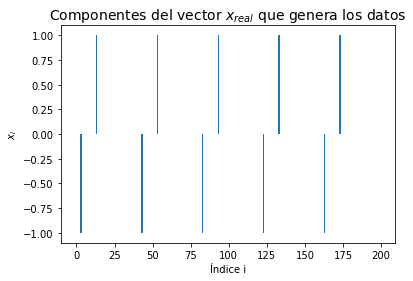

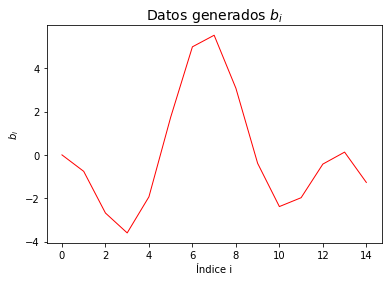

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Evalua cada función trigonométrica. 
def fnctrig(x, fparam):
    omega = fparam['omega']
    phi   = fparam['phi']
    return np.sin(omega*x + phi)

m    = 15   # Número de puntos z_i
r    = 10   # Número de angulos phi
s    = 20   # Número de frecuencias omega

z     = np.linspace(0, 9, m)
phi   = np.linspace(0, np.pi, r)
omega = np.linspace(0.5, 2.0, s)

print('Vector de frecuencias omega:\n', omega)
print('\nVector de ángulos de fase phi:\n', phi)

n  = r*s

# Se crea la matriz A 
A  = np.zeros((m, n))
for i,z_i in enumerate(z):
    mc = 0
    for j,phi_j in enumerate(phi):
        for l,omega_l in enumerate(omega):
            fparam   = {'omega':omega_l, 'phi':phi_j}
            A[i,mc] = fnctrig(z_i, fparam)
            mc += 1

x_real = np.zeros(n)
nc = 1 
for i in range(n):
    if i%r==3 and (i//s)%2==0:
        x_real[i] = (-1)**nc
        nc  += 1

b  = A @ x_real

print('\nDimensiones de la matriz A:', A.shape)

plt.figure()
plt.bar(np.arange(n), np.squeeze(x_real))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $x_{real}$ que genera los datos', fontsize=14)

plt.figure()
plt.plot(np.arange(m), b, 'r', linewidth=1)
plt.xlabel('Índice i')
plt.ylabel(r'$b_i$')
_=plt.title(r'Datos generados $b_i$', fontsize=14)

Dados la matriz $\mathbf{A}$ y el vector $\mathbf{b}$, queremos calcular un vector $\mathbf{x}$ tal que 

$$ \mathbf{b} = \mathbf{A} \mathbf{x}. $$

Como $\mathbf{A}$ es de tamaño $m \times n$, con $m<n$, no se puede resolver 
el sistema de ecuaciones o aplicar el método de mínimos cuadrados.

Como hay es un sistema subdeterminado, puede haber una infinidad de soluciones
Una manera obtener un vector $\mathbf{x}$ se seleccionar aquel que satisface
el sistema y tiene norma mínima (para que no ocurra como en las soluciones
de mínimos cuadrados en los que las componentes toman valores en el orden de 
decenas de miles mientras que el componentes de $\mathbf{b}$ están en orden
de unidades). Así se puede plantear el problema

$$  \min \|\mathbf{x}\|_2 \quad \text{sujeto a} \quad \mathbf{A} \mathbf{x} = \mathbf{b}. $$

Se puede ver que la solución de este problema está dada por (medio punto adicional 
si hacen la deducción)

$$ \mathbf{x}_{mn2} = \mathbf{A}^\top(\mathbf{A}\mathbf{A}^\top)^{-1} \mathbf{b}.$$

El problema es que esta solución no es rala,
es decir, que la mayoría de sus componentes son cero, tal como el
vector $\mathbf{x}_{real}$ que generó los datos $\mathbf{b}$.


El método "basis pursuit" propone calcular calcular $\mathbf{x}$ resolviendo el problema

$$  \min \|\mathbf{x}\|_1 \quad \text{sujeto a} \quad \mathbf{A} \mathbf{x} = \mathbf{b}. $$

Al minimizar la suma de valores absolutos de las variables $x_i$, se espera que la mayoría de éstas se hagan cero para reducir la suma, en especial si usamos 
un método como el método simplex que calcula soluciones básicas factibles
(todas la variables no básicas son cero).

Este problema lo podemos plantear como un problema de programación lineal, expresando el vector 
$\mathbf{x}$ como la resta de dos nuevos vectores de variables $\mathbf{u}$  y $\mathbf{v}$  no negativos:

$$ \mathbf{x} = \mathbf{u} - \mathbf{v}.$$

Así, se plantea el problema de programación lineal


$$  \min \; 
\mathbf{c}^\top 
\left(
\begin{array}{l}
\mathbf{u}  \\ \mathbf{v}
\end{array}
\right)
\quad \text{sujeto a} \quad 
[\mathbf{A}\;\; -\mathbf{A}] 
\left(
\begin{array}{l}
\mathbf{u}  \\ \mathbf{v}
\end{array}
\right)
= \mathbf{b}, \quad (\mathbf{u}, \mathbf{v}) \geq  \mathbf{0}, $$

donde $\mathbf{c}$ es el vector con todas sus componentes iguales a 1.

1. Calcule la solución de mínima norma 2, 

$$ \mathbf{x}_{mn2}. $$

-  Imprima el valor del error $\|\mathbf{A} \mathbf{x}-\mathbf{b}\|$
-  Grafique las entradas del vector mínima norma 2 para que
   pueda constatar que no es vector ralo y que no tiene parecido 
   con $\mathbf{x}_{real}$.
   
2. Resuelva el problema de programación lineal con alguna librería de Python.
3. Construya y resuelva el problema dual para obtener el vector $\lambda$ y 
   defina $\mathbf{s}$ como las variables de holgura del problema dual.
4. Verique si se cumplen las condiciones KKT para la variable primal $(\mathbf{u}, \mathbf{v})$
   y las variables duales  $(\lambda, \mathbf{s})$ (pueden que no se cumplan
   si la librería envió warnings sobre el mal condicionamiento de una matriz). 
5. Imprima y compare los valores de la función objetivo del problema 
   primal y del problema dual.
6. Calcule $\mathbf{x} = \mathbf{u} - \mathbf{v}$. Imprima el error $\|\mathbf{A} \mathbf{x}-\mathbf{b}\|$
   y grafique las entradas del vector $\mathbf{x}$.
   Comparado con la gráfica de $\mathbf{x}_{real}$, describa las similutudes
   o diferencias, y si menos 
   se cumple que es un vector ralo, que era el propósito original de cambiar
   la norma 2 por la norma 1 en la función objetivo del problema.
7. Repita los pasos 2 al 6, cambiando $m=50$. Vuelva a ejecutar el código 
   que genera a la matriz $\mathbf{A}$ y al vector $\mathbf{b}$.
   Describa si hay algún cambio en los resultados por el hecho de tener
   más ecuaciones.
   

### Solución:

En primer lugar, calculamos la solución al problema de minimización con la norma 2 utilizando la fórmula proporcionada, este vector lo denotamos por $\mathbf{x}^\ast_2$

In [4]:
# Norma 2
x_2norm=A.T@np.linalg.inv(A@A.T)@b
print('|Ax-b| = ',np.linalg.norm(A@x_2norm-b))

|Ax-b| =  0.0012767576284011112


Hacemos la gráfica de las componentes de $\mathbf{x}^\ast_2$

Text(0.5, 1.0, 'Componentes del vector $\\mathbf{x}^\\ast_2$ que genera los datos')

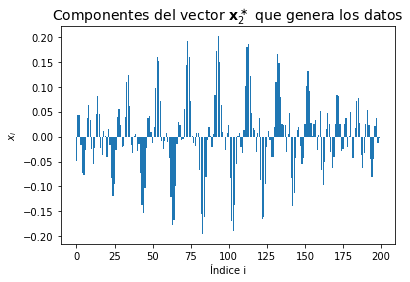

In [5]:
plt.bar(np.arange(n), np.squeeze(x_2norm))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $\mathbf{x}^\ast_2$ que genera los datos', fontsize=14)

Y claramente no es igual al vector $\mathbf{x}_{\mathrm{real}}$ propuesto.

Ahora, resolvemos el problema de programación lineal primal

In [6]:
from scipy.optimize import linprog
import scipy

c = np.ones(2*n)
A_primal=np.concatenate((A, -A), axis=1)

# Cotas de las variables
bnd = [(0, scipy.inf) for i in range(2*n)]

opt_primal = linprog(c=c, A_eq=A_primal, b_eq=b, bounds=bnd,
              method="simplex")

print('\nResultado del proceso:', opt_primal.message)
if opt_primal.success:
    print('Valor de la función objetivo:', opt_primal.fun)
    x_1norm=opt_primal.x
    


Resultado del proceso: Optimization terminated successfully.
Valor de la función objetivo: 5.758770483774055


Posteriormente, resolvemos el problema dual, en este caso consideramos el problema de $\min -\mathbf{b}^T\lambda$

In [7]:
# Coeficientes de la funcion objetivo
c_dual = -b

# Coeficientes del lado izquierdo de las desigualdades del tipo "menor o igual a"
A_dual = A_primal.T

# Coeficientes del vector del lado derecho de las desigualdades del tipo "menor o igual a"
b_dual = c

# Cotas para las variables
bnd = [(-scipy.inf, scipy.inf) for i in range(m)]


opt_dual = linprog(c=c_dual, A_ub=A_dual, b_ub=b_dual, bounds=bnd,
              method='interior-point')

print('\nResultado del proceso:', opt_dual.message)
if opt_dual.success:
    print('Valor de la función objetivo:', opt_dual.fun)
    lamb=opt_dual.x
    slack=opt_dual.slack


Resultado del proceso: Optimization terminated successfully.
Valor de la función objetivo: -5.75877048293428


Por lo que $\max \mathbf{b}^T\lambda=\min\mathbf{c}^T\mathbf{x}$, que es lo que pasa en dualidad fuerte. 

A continuación, verificamos las condiciones de KKT con un tolerancia $\tau=\sqrt{\epsilon_m}$

In [8]:
importlib.reload(lib_examen_2)
from lib_examen_2 import *

tol_KKT=np.finfo(float).eps**(1/2)
KKT_cond(tol_KKT,b,c,x_1norm,lamb,slack,A_primal)

Condicion 1: |AT*lamb+s-c| = 3.8459253727671276e-16
Condicion 2: |Ax-b| =  1.1050046463299629e-14
SI se cumple la condicion de no negatividad de x
SI se cumple la condicion de no negatividad de s
SI se cumple la condicion de complentariedad


Finalmente hayamos el $\mathbf{x}^\ast_1$, que es el vector solución en el problema con la norma $1$, con el problema de programación lineal hemos obtenido tanto su parte posivia como negativa. 

In [9]:
x_1norm_pos_part=x_1norm[:n]
x_1norm_neg_part=x_1norm[n:]
x_1norm_gen=x_1norm_pos_part-x_1norm_neg_part

print('|Ax-b| = ',np.linalg.norm(A@x_1norm_gen-b))

|Ax-b| =  1.1219401770546083e-14


La gráfica de los componentes de $\mathbf{x}^\ast_1$ es 

Text(0.5, 1.0, 'Componentes del vector $\\mathbf{x}^\\ast_1$ que genera los datos')

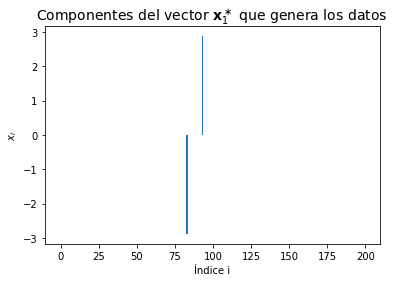

In [10]:
plt.bar(np.arange(n), np.squeeze(x_1norm_gen))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $\mathbf{x}^\ast_1$ que genera los datos', fontsize=14)

Evidentemente este vector es mucho más ralo que el real, lo que sugiere un modelo más simple aunque los datos fueron generados por un modelo más complejo. 

#### Caso $m=50$

Ahora replicamos los pasos, aumentando el número de ecuaciones

Vector de frecuencias omega:
 [0.5        0.57894737 0.65789474 0.73684211 0.81578947 0.89473684
 0.97368421 1.05263158 1.13157895 1.21052632 1.28947368 1.36842105
 1.44736842 1.52631579 1.60526316 1.68421053 1.76315789 1.84210526
 1.92105263 2.        ]

Vector de ángulos de fase phi:
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]

Dimensiones de la matriz A: (50, 200)


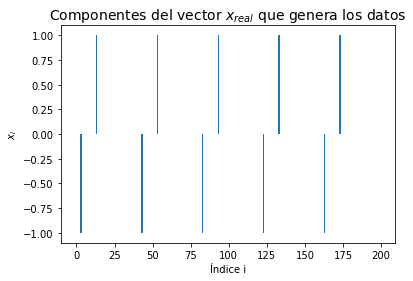

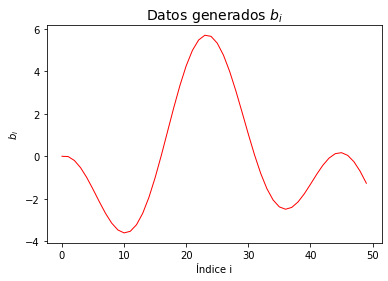

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Evalua cada función trigonométrica. 
def fnctrig(x, fparam):
    omega = fparam['omega']
    phi   = fparam['phi']
    return np.sin(omega*x + phi)

m    = 50   # Número de puntos z_i
r    = 10   # Número de angulos phi
s    = 20   # Número de frecuencias omega

z     = np.linspace(0, 9, m)
phi   = np.linspace(0, np.pi, r)
omega = np.linspace(0.5, 2.0, s)

print('Vector de frecuencias omega:\n', omega)
print('\nVector de ángulos de fase phi:\n', phi)

n  = r*s

# Se crea la matriz A 
A  = np.zeros((m, n))
for i,z_i in enumerate(z):
    mc = 0
    for j,phi_j in enumerate(phi):
        for l,omega_l in enumerate(omega):
            fparam   = {'omega':omega_l, 'phi':phi_j}
            A[i,mc] = fnctrig(z_i, fparam)
            mc += 1

x_real = np.zeros(n)
nc = 1 
for i in range(n):
    if i%r==3 and (i//s)%2==0:
        x_real[i] = (-1)**nc
        nc  += 1

b  = A @ x_real

print('\nDimensiones de la matriz A:', A.shape)

plt.figure()
plt.bar(np.arange(n), np.squeeze(x_real))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $x_{real}$ que genera los datos', fontsize=14)

plt.figure()
plt.plot(np.arange(m), b, 'r', linewidth=1)
plt.xlabel('Índice i')
plt.ylabel(r'$b_i$')
_=plt.title(r'Datos generados $b_i$', fontsize=14)

La solución con norma 2 la obtenemos a continuación. El error es

In [12]:
# Norma 2
x_2norm=A.T@np.linalg.inv(A@A.T)@b
print('|Ax-b| = ',np.linalg.norm(A@x_2norm-b))

|Ax-b| =  114.54984322728232


Sus componentes son

Text(0.5, 1.0, 'Componentes del vector $\\mathbf{x}^\\ast_2$ que genera los datos')

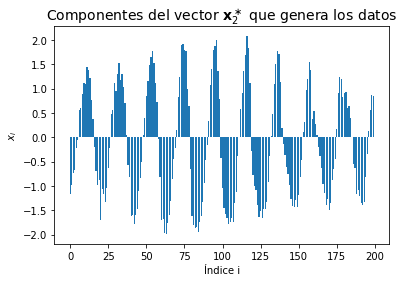

In [13]:
plt.bar(np.arange(n), np.squeeze(x_2norm))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $\mathbf{x}^\ast_2$ que genera los datos', fontsize=14)

El problema primal en este caso es

In [14]:
from scipy.optimize import linprog
import scipy

c = np.ones(2*n)
A_primal=np.concatenate((A, -A), axis=1)

# Cotas de las variables
bnd = [(0, scipy.inf) for i in range(2*n)]

opt_primal = linprog(c=c, A_eq=A_primal, b_eq=b, bounds=bnd,
              method='interior-point')

print('\nResultado del proceso:', opt_primal.message)
if opt_primal.success:
    print('Valor de la función objetivo:', opt_primal.fun)
    x_1norm=opt_primal.x


Resultado del proceso: Optimization terminated successfully.
Valor de la función objetivo: 5.758770483204005


El dual correspondiente

In [15]:
# Coeficientes de la funcion objetivo
c_dual = -b

# Coeficientes del lado izquierdo de las desigualdades del tipo "menor o igual a"
A_dual = A_primal.T

# Coeficientes del vector del lado derecho de las desigualdades del tipo "menor o igual a"
b_dual = c

# Cotas para las variables
bnd = [(-scipy.inf, scipy.inf) for i in range(m)]


opt_dual = linprog(c=c_dual, A_ub=A_dual, b_ub=b_dual, bounds=bnd,
              method='interior-point')

print('\nResultado del proceso:', opt_dual.message)
if opt_dual.success:
    print('Valor de la función objetivo:', opt_dual.fun)
    lamb=opt_dual.x
    slack=opt_dual.slack


Resultado del proceso: Optimization terminated successfully.
Valor de la función objetivo: -5.758770483051036


Verificamos las condiciones KKT

In [16]:
importlib.reload(lib_examen_2)
from lib_examen_2 import *

tol_KKT=np.finfo(float).eps**(1/2)
KKT_cond(tol_KKT,b,c,x_1norm,lamb,slack,A_primal)

Condicion 1: |AT*lamb+s-c| = 2.9373740229761033e-16
Condicion 2: |Ax-b| =  3.67522363563323e-10
SI se cumple la condicion de no negatividad de x
SI se cumple la condicion de no negatividad de s
SI se cumple la condicion de complentariedad


El error en este caso es

In [17]:
x_1norm_pos_part=x_1norm[:n]
x_1norm_neg_part=x_1norm[n:]
x_1norm_gen=x_1norm_pos_part-x_1norm_neg_part

print('|Ax-b| = ',np.linalg.norm(A@x_1norm_gen-b))

|Ax-b| =  3.675217025201218e-10


Y las componentes de la solución con la norma 1 las visualizamos a continuación

Text(0.5, 1.0, 'Componentes del vector $\\mathbf{x}^\\ast_1$ que genera los datos')

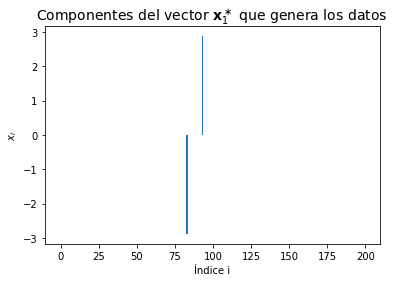

In [18]:
plt.bar(np.arange(n), np.squeeze(x_1norm_gen))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $\mathbf{x}^\ast_1$ que genera los datos', fontsize=14)

De igual forma tenemos una solución igual de sparse a pesar de aumentar el numero de ecuaciones

Para justificar la fórmula cerrada que tenemos para el caso del problema de optimización con la norma 2 utilizaremos el método de multiplicadores de Lagrange.

La función langrangiana es la siguiente
$$ 
\mathcal{L}(\mathbf{x},\lambda)=\lVert x \rVert_2-\lambda^T(\mathbf{A}\mathbf{x}-\mathbf{b}),
$$

luego el gradiente es 
$$
\nabla \mathcal{L}(\mathbf{x},\lambda)=\begin{bmatrix}2\mathbf{x}-\mathbf{A}^T\lambda \\
\mathbf{A}\mathbf{x}-\mathbf{b}\end{bmatrix}
$$

Por lo tanto, un punto critico es a que que anula el gradiente anterior, derivamos que $\lambda^\ast=(\mathbf{A}\mathbf{A}^T)^{-1}b$ por lo que 
$$ 
    \mathbf{x}^\ast=\mathbf{A}^T(\mathbf{A}\mathbf{A}^T)^{-1}b,
$$
y se puede ver que $(\mathbf{x}^\ast,\lambda^\ast)$ cumplen las condiciones de segundo orden por lo que es mínimo local, y en virtud de estar en un problema convexo se tiene que $\mathbf{x}^\ast$ es mínimo global del problema de optimización con restricciones.